# Exploratory Data Analysis

Created_by: Promise Ekeh

Date: May 2024

This notebook is the first of many notebook to illustrate steps I took to train a machine learning model to predict lithology from well log for my MSC project at Imperial College London

This notebook highlights data loading and initial exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
#printing out versions of all packages and libraries and used

print(f'pandas version is: {pd.__version__}')
print(f'numpy version is: {np.__version__}')
print(f'matplotlib version is: {matplotlib.__version__}')

pandas version is: 2.2.1
numpy version is: 1.26.4
matplotlib version is: 3.8.3


# About the data


FORCE Machine Learning competition 2020 dataset is used for this research

https://github.com/bolgebrygg/Force-2020-Machine-Learning-competition/tree/master/lithology_competition/data

In [3]:
#Load the train data
data = pd.read_csv("../data/train.csv", sep=';')
data

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.5280,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.6800,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.8320,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.9840,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.1360,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170506,7/1-2 S,3169.3124,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.423170,NaN,NaN,...,27.674368,NaN,NaN,-0.001763,NaN,NaN,26.673708,NaN,30000,2.0
1170507,7/1-2 S,3169.4644,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.379244,NaN,NaN,...,28.024338,NaN,NaN,-0.007600,NaN,NaN,26.840818,NaN,65030,2.0
1170508,7/1-2 S,3169.6164,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.350248,NaN,NaN,...,28.091282,NaN,NaN,-0.018297,NaN,NaN,27.007942,NaN,65030,2.0
1170509,7/1-2 S,3169.7684,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.313779,NaN,NaN,...,28.019775,NaN,NaN,-0.011438,NaN,NaN,27.175179,NaN,65030,2.0


In [4]:
data.shape

(1170511, 29)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170511 entries, 0 to 1170510
Data columns (total 29 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   WELL                               1170511 non-null  object 
 1   DEPTH_MD                           1170511 non-null  float64
 2   X_LOC                              1159736 non-null  float64
 3   Y_LOC                              1159736 non-null  float64
 4   Z_LOC                              1159736 non-null  float64
 5   GROUP                              1169233 non-null  object 
 6   FORMATION                          1033517 non-null  object 
 7   CALI                               1082634 non-null  float64
 8   RSHA                               630650 non-null   float64
 9   RMED                               1131518 non-null  float64
 10  RDEP                               1159496 non-null  float64
 11  RHOB                    

In [6]:
data.describe()

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
count,1.170511e+06,1.159736e+06,1.159736e+06,1.159736e+06,1.082634e+06,630650.000000,1.131518e+06,1.159496e+06,1.009242e+06,1.170511e+06,...,535071.000000,174613.000000,298833.000000,987857.000000,316151.000000,176160.000000,192325.000000,327427.000000,1.170511e+06,1.170332e+06
mean,2.184087e+03,4.856310e+05,6.681276e+06,-2.138527e+03,1.318568e+01,10.694664,4.986978e+00,1.069103e+01,2.284987e+00,7.091370e+01,...,137.367965,204.655019,1.223849,0.012196,1.216329,7.796809,23.505069,-95.779496,6.138598e+04,1.164258e+00
std,9.971821e+02,3.455641e+04,1.281524e+05,9.709426e+02,3.798907e+00,100.642597,5.467269e+01,1.139480e+02,2.532835e-01,3.423149e+01,...,1539.383558,71.068461,54.372859,7.477798,10.180834,89.741807,22.632800,348.980030,1.389170e+04,4.451180e-01
min,1.360860e+02,4.268988e+05,6.406641e+06,-5.395563e+03,2.344000e+00,0.000100,-8.418695e-03,3.170056e-02,7.209712e-01,1.092843e-01,...,-0.117977,69.163177,-12.215459,-7429.338867,0.125818,0.056586,-999.250122,-999.900024,3.000000e+04,1.000000e+00
25%,1.418597e+03,4.547996e+05,6.591327e+06,-2.811502e+03,9.429712e+00,0.854120,9.140862e-01,9.102396e-01,2.092203e+00,4.762722e+01,...,5.628000,155.936707,0.148438,-0.009253,0.143792,0.891272,11.281895,0.687681,6.500000e+04,1.000000e+00
50%,2.076605e+03,4.769203e+05,6.737311e+06,-2.042785e+03,1.255575e+01,1.399020,1.443584e+00,1.439000e+00,2.321228e+00,6.836763e+01,...,17.799999,188.200653,0.557320,0.001752,0.155774,1.967156,20.131153,1.366672,6.500000e+04,1.000000e+00
75%,2.864393e+03,5.201532e+05,6.784886e+06,-1.391866e+03,1.671075e+01,3.099348,2.680930e+00,2.557220e+00,2.488580e+00,8.903551e+01,...,34.812794,224.645081,1.299655,0.021702,1.168307,5.084564,31.138481,3.420790,6.500000e+04,1.000000e+00
max,5.436632e+03,5.726328e+05,6.856661e+06,-1.110860e+02,2.827900e+01,2193.904541,1.988616e+03,1.999887e+03,3.457820e+00,1.076964e+03,...,47015.125000,676.578125,10011.422852,2.836938,185.730927,10000.000000,742.797852,35930.671875,9.900000e+04,3.000000e+00


# Missing data

In [7]:
data.isna().sum()

WELL                                       0
DEPTH_MD                                   0
X_LOC                                  10775
Y_LOC                                  10775
Z_LOC                                  10775
GROUP                                   1278
FORMATION                             136994
CALI                                   87877
RSHA                                  539861
RMED                                   38993
RDEP                                   11015
RHOB                                  161269
GR                                         0
SGR                                  1101158
NPHI                                  405102
PEF                                   498819
DTC                                    80863
SP                                    306264
BS                                    487854
ROP                                   635440
DTS                                   995898
DCAL                                  871678
DRHO      

In [8]:
data=data.rename(columns={'FORCE_2020_LITHOFACIES_LITHOLOGY': 'LITHOLOGY', 'FORCE_2020_LITHOFACIES_CONFIDENCE':'CONFIDENCE'})

## Functions

In [10]:
#create functions for EDA to usability
def get_available_data (data):
    """ 
    This function get the count of the available (not missing) files in each column (log)
    """
    well_dict=data.notna().sum().to_dict()
    available= pd.DataFrame()
    available[['log', 'data_count']]=well_dict.keys(), well_dict.values()
    available['percent'] = available['data_count']/data.shape[0] *100
    return available


def plot_available_data(data, percentage= True):
    """ Plots the available data count in the data 
    arg:
        dataframe
        percentage: True (default)
    if true it plots the percentage else plots the count
    """
    df= get_available_data(data)
    plt.figure(figsize=(14, 7))
    if percentage:
        plt.bar(df.log, df.percent)
        plt.xticks(rotation=45)
        plt.ylabel('Well presence (%)');
        plt.title('Available Data (%)')
    else:
        plt.bar(df.log, df.data_count)
        plt.xticks(rotation=45)
        plt.ylabel('Well presence');
        plt.title('Available Data (count)')
        

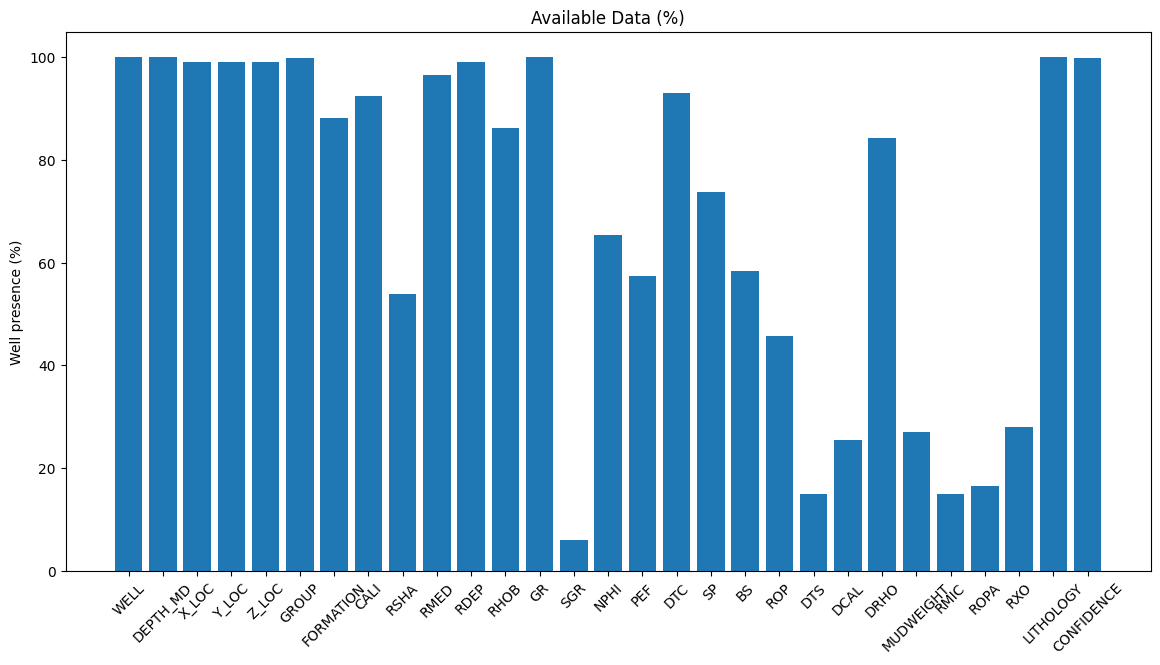

In [11]:
plot_available_data(data)

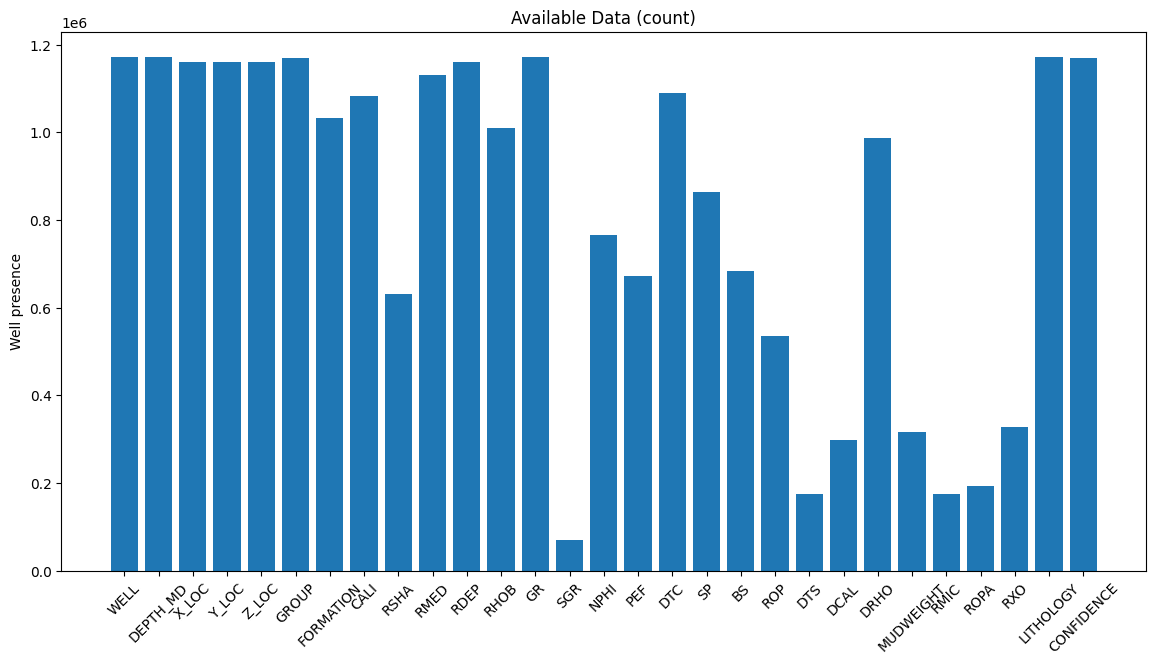

In [12]:
plot_available_data(data, percentage=False)

In [14]:
# !pip install missingno #to install the package

import missingno
import matplotlib.patches as mpatches

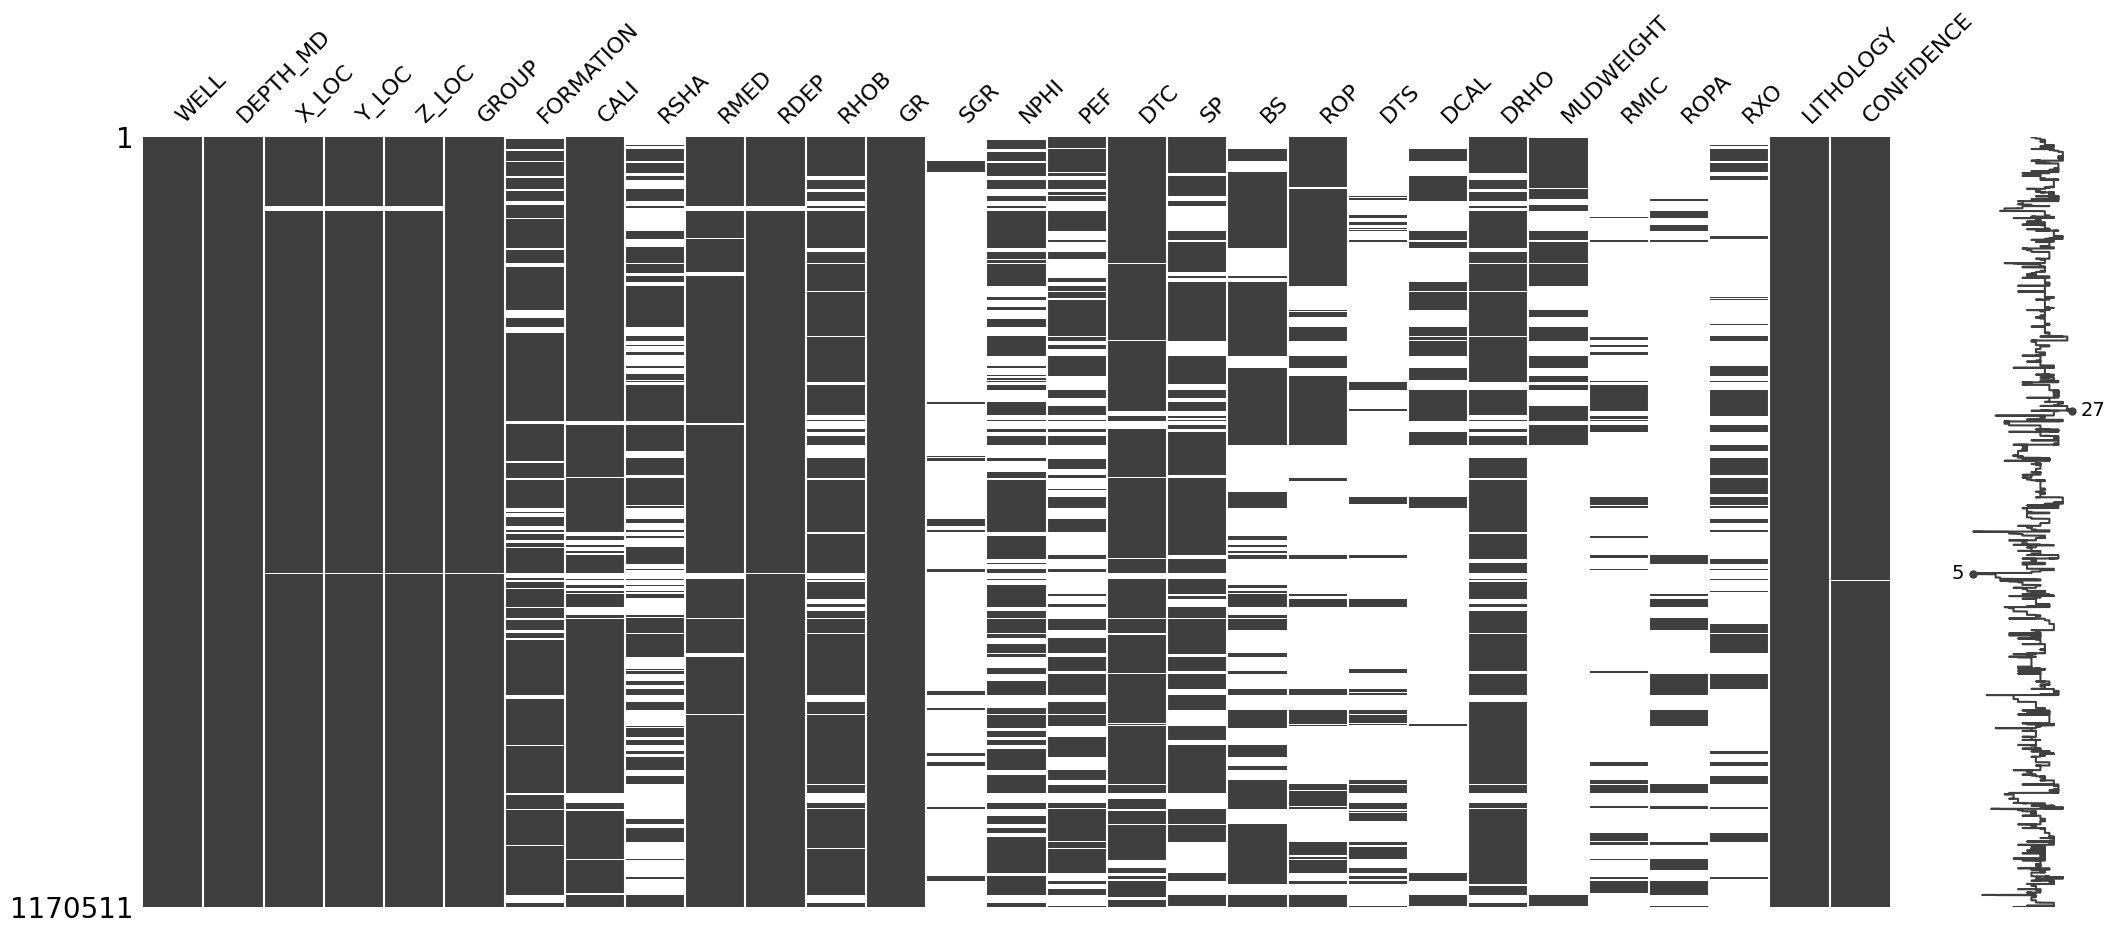

In [15]:
# Using the missingno libarary plot the missing rows in each column to see the rows where they are missing
missingno.matrix(data);
colors = ["g", "w"]
gray_patch = mpatches.Patch(color='green', label='Data present')
white_patch = mpatches.Patch(color='white', label='Data absent ')
#plt.legend(handles=[gray_patch, white_patch],loc ="best", bbox_to_anchor=(1, 0.5), prop={'size': 20})
# plt.savefig("./images/Missing-Log2.png");
plt.show()

# Column Exploration

In [16]:
data['CONFIDENCE'].unique()

array([ 1.,  3.,  2., nan])

In [17]:
data['CONFIDENCE'].value_counts()

CONFIDENCE
1.0    1013705
2.0     121018
3.0      35609
Name: count, dtype: int64

In [18]:
data['LITHOLOGY'].value_counts()

LITHOLOGY
65000    720803
30000    168937
65030    150455
70000     56320
80000     33329
99000     15245
70032     10513
88000      8213
90000      3820
74000      1688
86000      1085
93000       103
Name: count, dtype: int64

<Axes: xlabel='LITHOLOGY'>

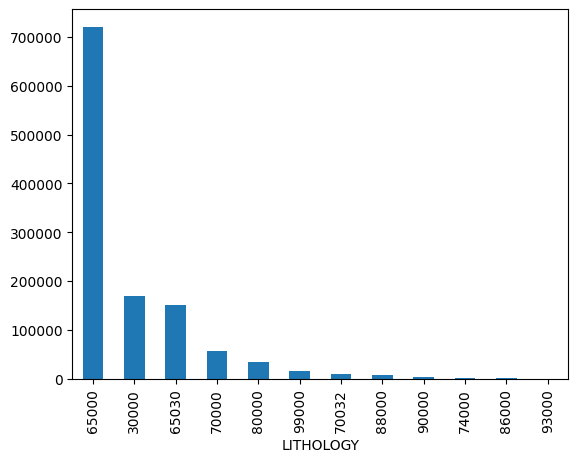

In [20]:
# Barchart to see distribution of lithology code present
data['LITHOLOGY'].value_counts().plot(kind='bar')

In [21]:
# create a lithology code dictionary to map to the actual lithology
lithology_keys = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 74000: 'Dolomite',
                 70000: 'Limestone',
                 70032: 'Chalk',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 99000: 'Tuff',
                 90000: 'Coal',
                 93000: 'Basement'}

data['LITH']= data['LITHOLOGY'].map(lithology_keys)

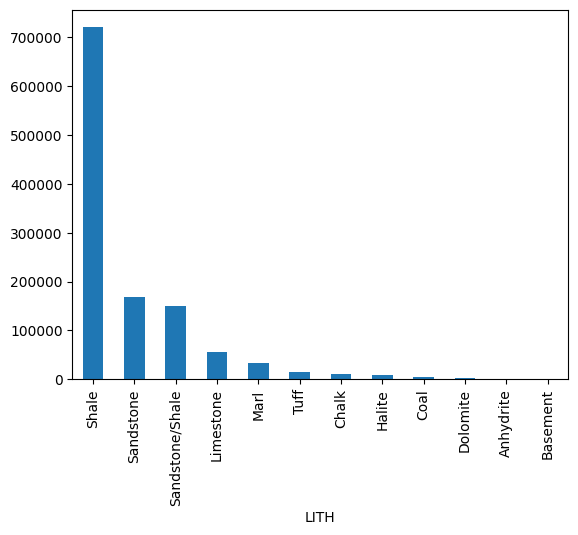

In [22]:
data['LITH'].value_counts().plot(kind='bar');

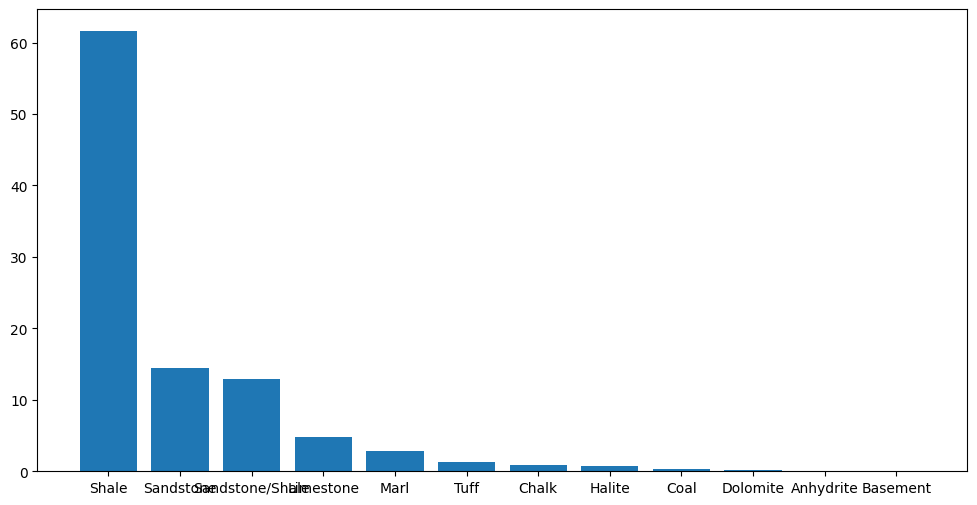

In [24]:
# get the lithology distribution in percentage
label_dict= dict(data['LITH'].value_counts())
fig = plt.figure(figsize=(12, 6))
plt.bar(label_dict.keys(), (np.array(list(label_dict.values()))/data.shape[0]) * 100);

In [25]:
data.columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC',
       'ROPA', 'RXO', 'LITHOLOGY', 'CONFIDENCE', 'LITH'],
      dtype='object')

In [26]:
# create a list of columns (logs)
log= ['Z_LOC', 'DEPTH_MD','CALI', 'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'BS', 'PEF', 'DTC', 'SP' ]
df=data[log]
df

,Z_LOC,DEPTH_MD,CALI,RMED,RDEP,RHOB,GR,NPHI,BS,PEF,DTC,SP
0,-469.501831,494.5280,19.480835,1.611410,1.798681,1.884186,80.200851,NaN,NaN,20.915468,161.131180,24.612379
1,-469.653809,494.6800,19.468800,1.618070,1.795641,1.889794,79.262886,NaN,NaN,19.383013,160.603470,23.895531
2,-469.805786,494.8320,19.468800,1.626459,1.800733,1.896523,74.821999,NaN,NaN,22.591518,160.173615,23.916357
3,-469.957794,494.9840,19.459282,1.621594,1.801517,1.891913,72.878922,NaN,NaN,32.191910,160.149429,23.793688
4,-470.109772,495.1360,19.453100,1.602679,1.795299,1.880034,71.729141,NaN,NaN,38.495632,160.128342,24.104078
...,...,...,...,...,...,...,...,...,...,...,...,...
1170506,NaN,3169.3124,8.423170,NaN,NaN,2.527984,77.654900,NaN,8.5,4.586425,NaN,NaN
1170507,NaN,3169.4644,8.379244,NaN,NaN,2.537613,75.363937,NaN,8.5,7.019858,NaN,NaN
1170508,NaN,3169.6164,8.350248,NaN,NaN,2.491860,66.452843,NaN,8.5,9.049782,NaN,NaN
1170509,NaN,3169.7684,8.313779,NaN,NaN,2.447539,55.784817,NaN,8.5,8.903917,NaN,NaN


## Corr Matrix

In [27]:
# create a correlation matrix using the pre-selected logs
corr_matrix = df.corr()
corr_matrix

,Z_LOC,DEPTH_MD,CALI,RMED,RDEP,RHOB,GR,NPHI,BS,PEF,DTC,SP
Z_LOC,1.000000,-0.994761,0.577283,-0.040089,-0.053246,-0.743765,-0.088711,0.551328,0.589167,-0.034736,0.781330,-0.033998
DEPTH_MD,-0.994761,1.000000,-0.583351,0.055476,0.051349,0.741904,0.098282,-0.544272,-0.589287,0.027801,-0.777914,0.034592
CALI,0.577283,-0.583351,1.000000,-0.042424,-0.030207,-0.570643,-0.240646,0.446972,0.903260,0.049174,0.588739,-0.033151
RMED,-0.040089,0.055476,-0.042424,1.000000,0.131140,-0.008321,-0.015930,-0.046519,-0.089160,0.055052,-0.095603,-0.022370
RDEP,-0.053246,0.051349,-0.030207,0.131140,1.000000,-0.039025,-0.097851,-0.181104,-0.038446,-0.005872,-0.105184,-0.021965
RHOB,-0.743765,0.741904,-0.570643,-0.008321,-0.039025,1.000000,0.165372,-0.623808,-0.484052,-0.094279,-0.825593,0.057665
GR,-0.088711,0.098282,-0.240646,-0.015930,-0.097851,0.165372,1.000000,0.222430,-0.135337,-0.080795,0.022096,0.095809
NPHI,0.551328,-0.544272,0.446972,-0.046519,-0.181104,-0.623808,0.222430,1.000000,0.351148,0.022899,0.788425,-0.112908
BS,0.589167,-0.589287,0.903260,-0.089160,-0.038446,-0.484052,-0.135337,0.351148,1.000000,0.079112,0.544480,0.085211
PEF,-0.034736,0.027801,0.049174,0.055052,-0.005872,-0.094279,-0.080795,0.022899,0.079112,1.000000,0.026209,-0.005365


<Axes: >

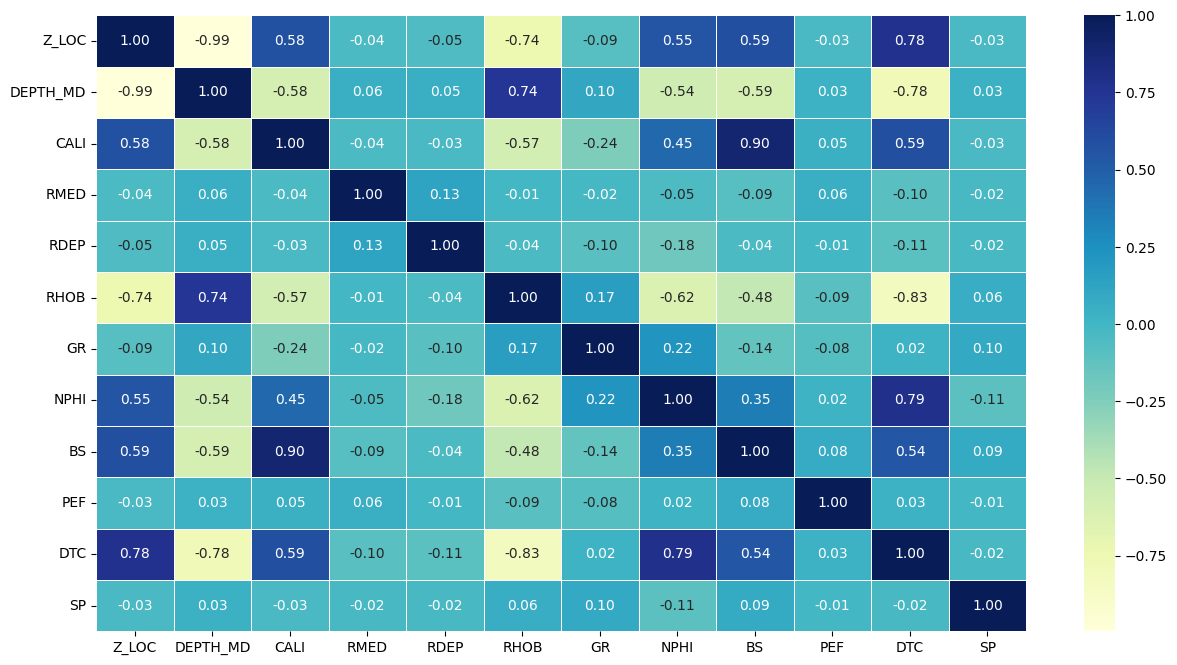

In [28]:
# plot a heatmap of the correlation matrix

plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu",
                 )

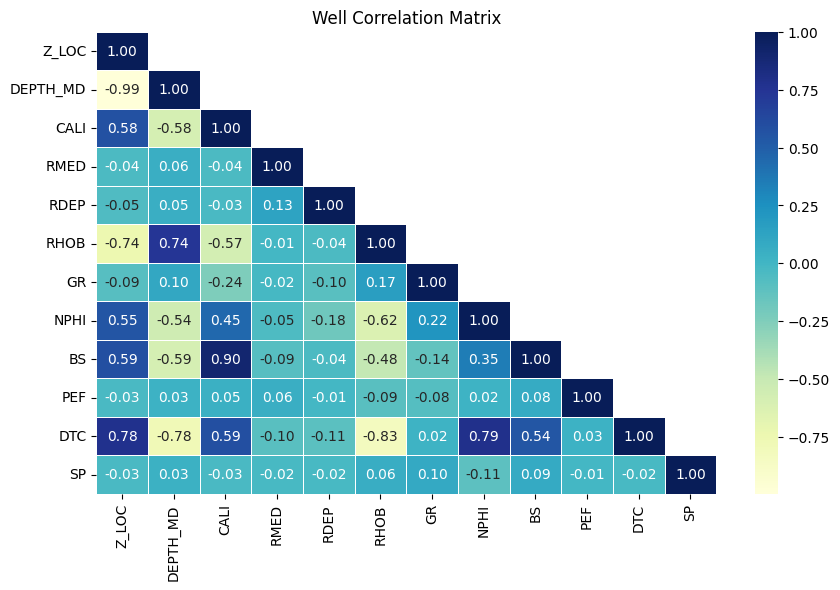

In [29]:
# remove the top right half of the heatmap as it's a repetition of bottom left using np.tril

cm_tril=corr_matrix.where(np.tril(np.ones_like(corr_matrix, dtype=bool)))
# cm_tril=corr_matrix.where(np.triu(np.ones_like(corr_matrix, dtype=bool))) # keeps top-right half
plt.figure(figsize=(10, 6))
sns.heatmap(cm_tril,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu",
                 )
plt.title('Well Correlation Matrix');

## Hist

Plot histogram to Visualise the data distribution of in the different columns



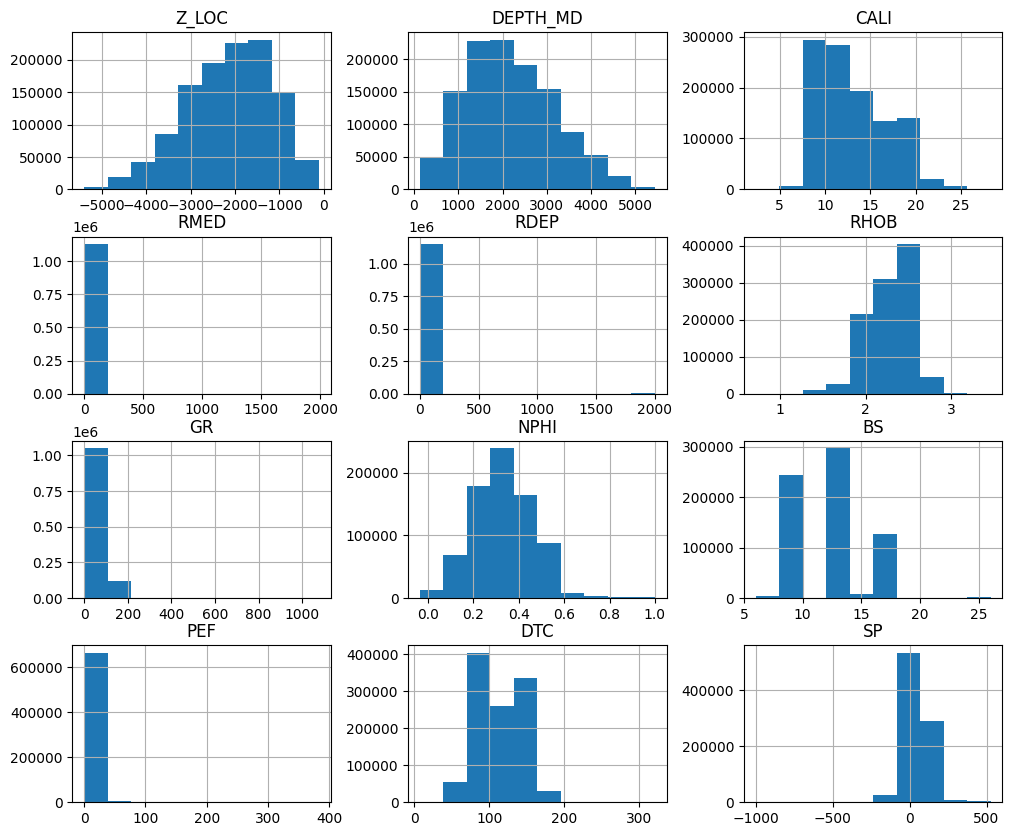

In [30]:
df[log].hist(figsize=(12, 10));

## Box Plot
Boxplots are graphical and standardised way to display the distribution of data

There are standard log ranges for these well logs let's plot to see if the distribution is inline with what we expect or if we have outliers in the dataset

<Axes: >

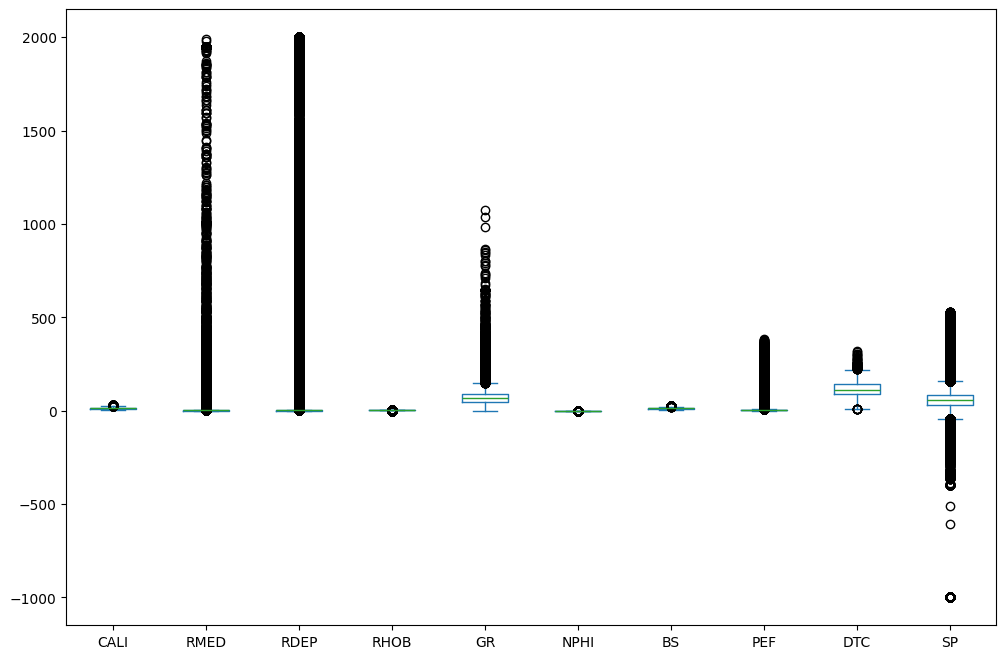

In [54]:
# boxplot of selected logs. the logs are in different scales so we can't say much from this plot, we'll make other plots to visualise this better
df.iloc[:,2:].plot(kind='box', figsize=(12, 8))

<Axes: >

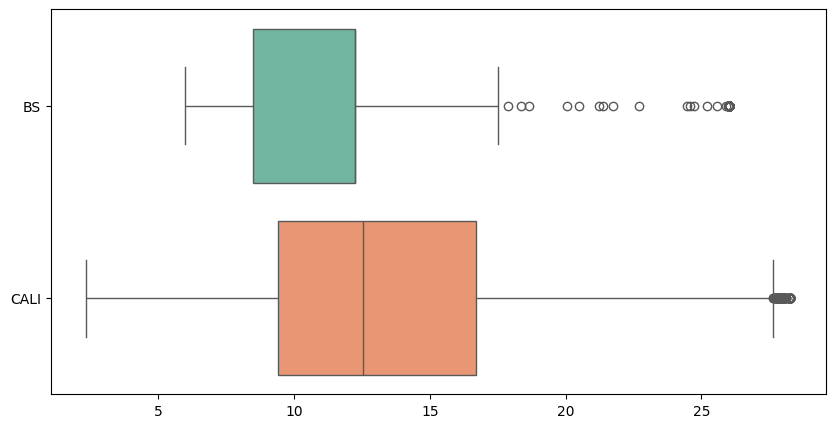

In [52]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['BS', 'CALI']], orient="h", palette="Set2")

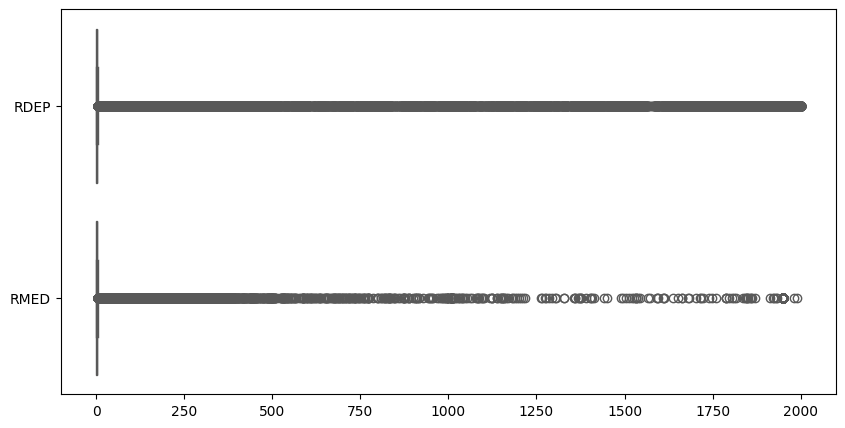

In [53]:
plt.figure(figsize=(10, 5))
ax = sns.boxplot(data=df[['RDEP', 'RMED']], orient="h", palette="Set2")

[]

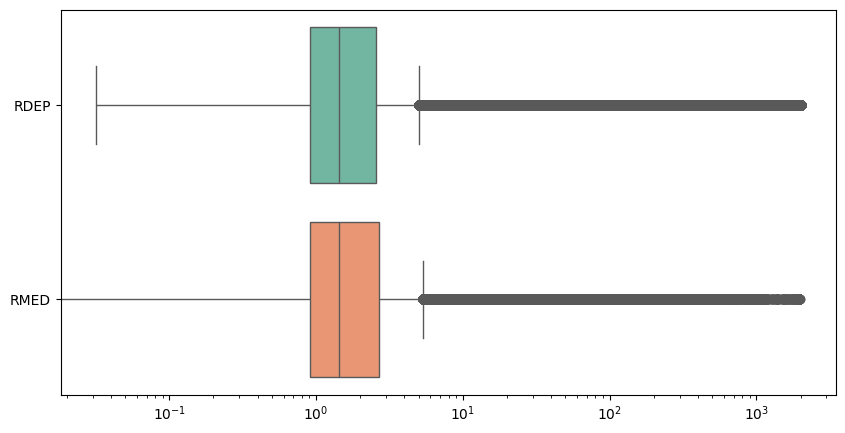

In [67]:
# resistivty is usually read in logarithmic so we can visualise this in logscale
plt.figure(figsize=(10, 5))
ax = sns.boxplot(data=df[['RDEP', 'RMED']], orient="h", palette="Set2")
ax.semilogx()

<Axes: xlabel='GR', ylabel='LITH'>

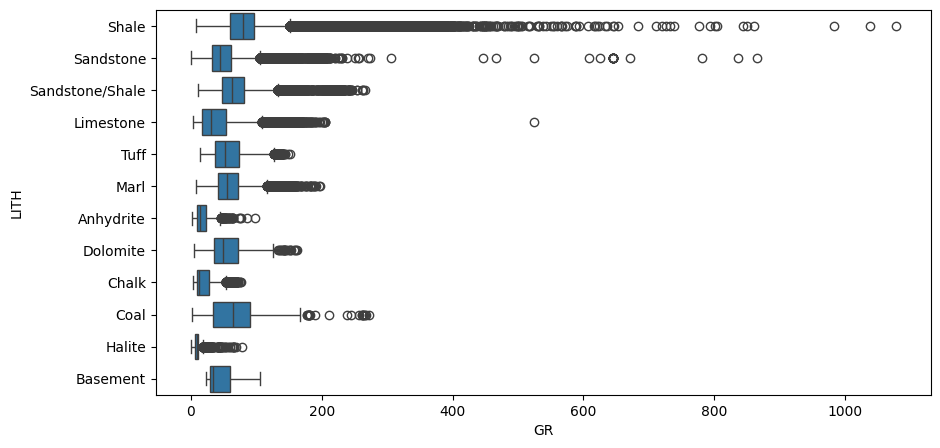

In [56]:
# We can create a plot to visualise the distribution of the differnt lithologies with the well logs, this can help show if certain ranges of logs relates to any lithology in particular
plt.figure(figsize=(10, 5))

sns.boxplot(y='LITH', x='GR', data=data)

<Axes: xlabel='NPHI', ylabel='LITH'>

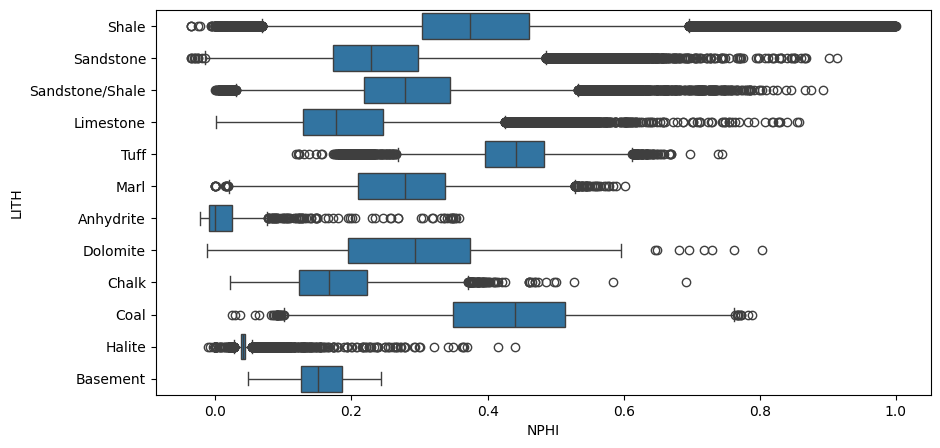

In [57]:
plt.figure(figsize=(10, 5))
sns.boxplot(y='LITH', x='NPHI', data=data)

# Plot location

Things to try
* plot well location on map ising folium or plotly
* size of points should be how many well logs present

can't do this at the moment because the well location is in x and y and need to convert to lat and long to plot. Will get to this much later

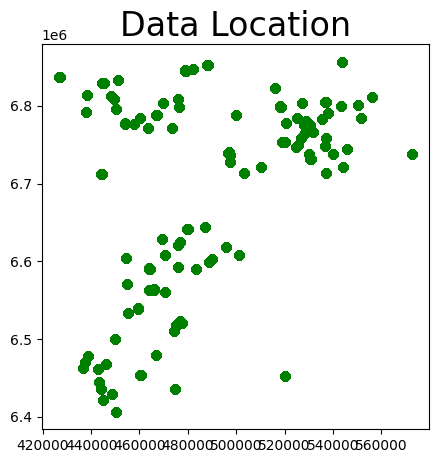

In [30]:
#for now we'll make do with this
plt.figure(figsize=(5,5))
plt.scatter(data['X_LOC'], data['Y_LOC'], label='Train', c='g')
plt.title('Data Location', fontsize=24)
plt.show();


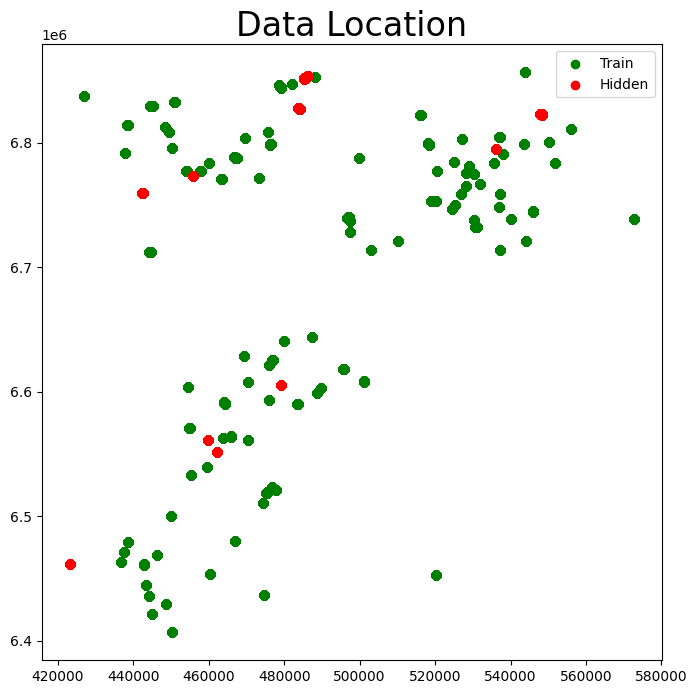

In [31]:
# We can include the hidden test data to see the distribution. We'll have a different notebook to explore the hidden test data
hidden_test = pd.read_csv("../data/test_features.csv", sep=';')
plt.figure(figsize=(8,8))
plt.scatter(data['X_LOC'], data['Y_LOC'], label='Train', c='g')
plt.scatter(hidden_test['X_LOC'], hidden_test['Y_LOC'], label='Hidden', c='r')
plt.title('Data Location', fontsize=24)
plt.legend()
plt.show();

# Individual well analysis

we'll come back to data exploratory of the whole dataset for now let's explore visualising the individual wells

In [32]:
# Let's get a list of all the well in the train data
wells = list(data['WELL'].unique())
print('Number of wells', len(wells))
wells


Number of wells 98


['15/9-13',
 '15/9-15',
 '15/9-17',
 '16/1-2',
 '16/1-6 A',
 '16/10-1',
 '16/10-2',
 '16/10-3',
 '16/10-5',
 '16/11-1 ST3',
 '16/2-11 A',
 '16/2-16',
 '16/2-6',
 '16/4-1',
 '16/5-3',
 '16/7-4',
 '16/7-5',
 '16/8-1',
 '17/11-1',
 '25/11-15',
 '25/11-19 S',
 '25/11-5',
 '25/2-13 T4',
 '25/2-14',
 '25/2-7',
 '25/3-1',
 '25/4-5',
 '25/5-1',
 '25/5-4',
 '25/6-1',
 '25/6-2',
 '25/6-3',
 '25/7-2',
 '25/8-5 S',
 '25/8-7',
 '25/9-1',
 '26/4-1',
 '29/6-1',
 '30/3-3',
 '30/3-5 S',
 '30/6-5',
 '31/2-1',
 '31/2-19 S',
 '31/2-7',
 '31/2-8',
 '31/2-9',
 '31/3-1',
 '31/3-2',
 '31/3-3',
 '31/3-4',
 '31/4-10',
 '31/4-5',
 '31/5-4 S',
 '31/6-5',
 '31/6-8',
 '32/2-1',
 '33/5-2',
 '33/6-3 S',
 '33/9-1',
 '33/9-17',
 '34/10-19',
 '34/10-21',
 '34/10-33',
 '34/10-35',
 '34/11-1',
 '34/11-2 S',
 '34/12-1',
 '34/2-4',
 '34/3-1 A',
 '34/4-10 R',
 '34/5-1 A',
 '34/5-1 S',
 '34/7-13',
 '34/7-20',
 '34/7-21',
 '34/8-1',
 '34/8-3',
 '34/8-7 R',
 '35/11-1',
 '35/11-10',
 '35/11-11',
 '35/11-12',
 '35/11-13',
 '35/11

In [33]:
# Let's get with the first well using the index 0
well=wells[0]
well

'15/9-13'

In [34]:
# Let's get a subset dataframe of that well
well_data=data[data['WELL']==well]
well_data

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,LITHOLOGY,CONFIDENCE,LITH
0,15/9-13,494.528,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0,Shale
1,15/9-13,494.680,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0,Shale
2,15/9-13,494.832,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0,Shale
3,15/9-13,494.984,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0,Shale
4,15/9-13,495.136,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0,Shale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18265,15/9-13,3271.416,437593.40625,6470983.0,-3245.549316,ZECHSTEIN GP.,Smith Bank Fm.,8.541623,NaN,8.585064,...,NaN,NaN,-0.005047,0.155774,NaN,NaN,NaN,74000,3.0,Dolomite
18266,15/9-13,3271.568,437593.37500,6470983.0,-3245.700928,ZECHSTEIN GP.,Smith Bank Fm.,8.557213,NaN,8.142556,...,NaN,NaN,0.002087,0.155774,NaN,NaN,NaN,74000,3.0,Dolomite
18267,15/9-13,3271.720,437593.37500,6470983.0,-3245.852539,ZECHSTEIN GP.,Smith Bank Fm.,8.577917,NaN,7.933336,...,NaN,NaN,0.007469,0.155774,NaN,NaN,NaN,74000,3.0,Dolomite
18268,15/9-13,3271.872,437593.37500,6470983.0,-3246.004395,ZECHSTEIN GP.,Smith Bank Fm.,8.478219,NaN,7.837981,...,NaN,NaN,0.010048,0.155774,NaN,NaN,NaN,74000,3.0,Dolomite


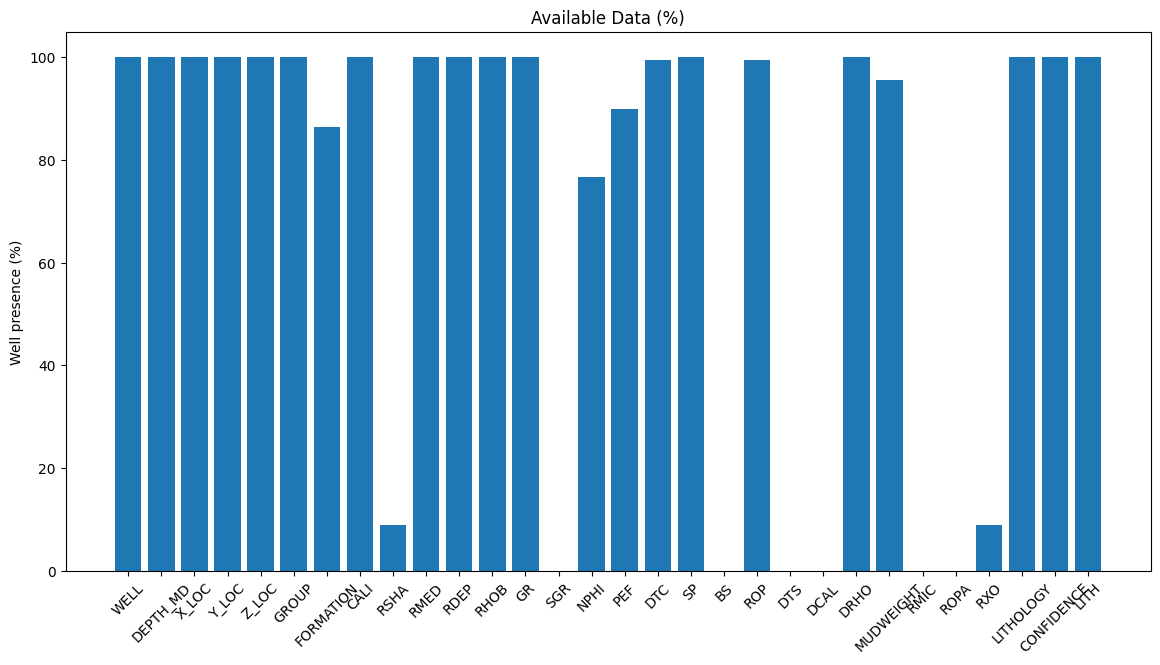

In [35]:
# Let's plot the available data for this well using the plot_available function
plot_available_data(well_data)

In [40]:
# create a function to plot the missing data for each row/depth
def plot_missingno(data):
    
    #ensure data is sorted by depth
    missingno.matrix(data)
    # colors = ["g", "w"]
    # gray_patch = mpatches.Patch(color='green', label='Data present')
    # white_patch = mpatches.Patch(color='white', label='Data absent ')
    plt.ylabel(f'MIN depth{data['DEPTH_MD'].min()} - MAX depth{data['DEPTH_MD'].max()}', fontsize=14)
    plt.show()

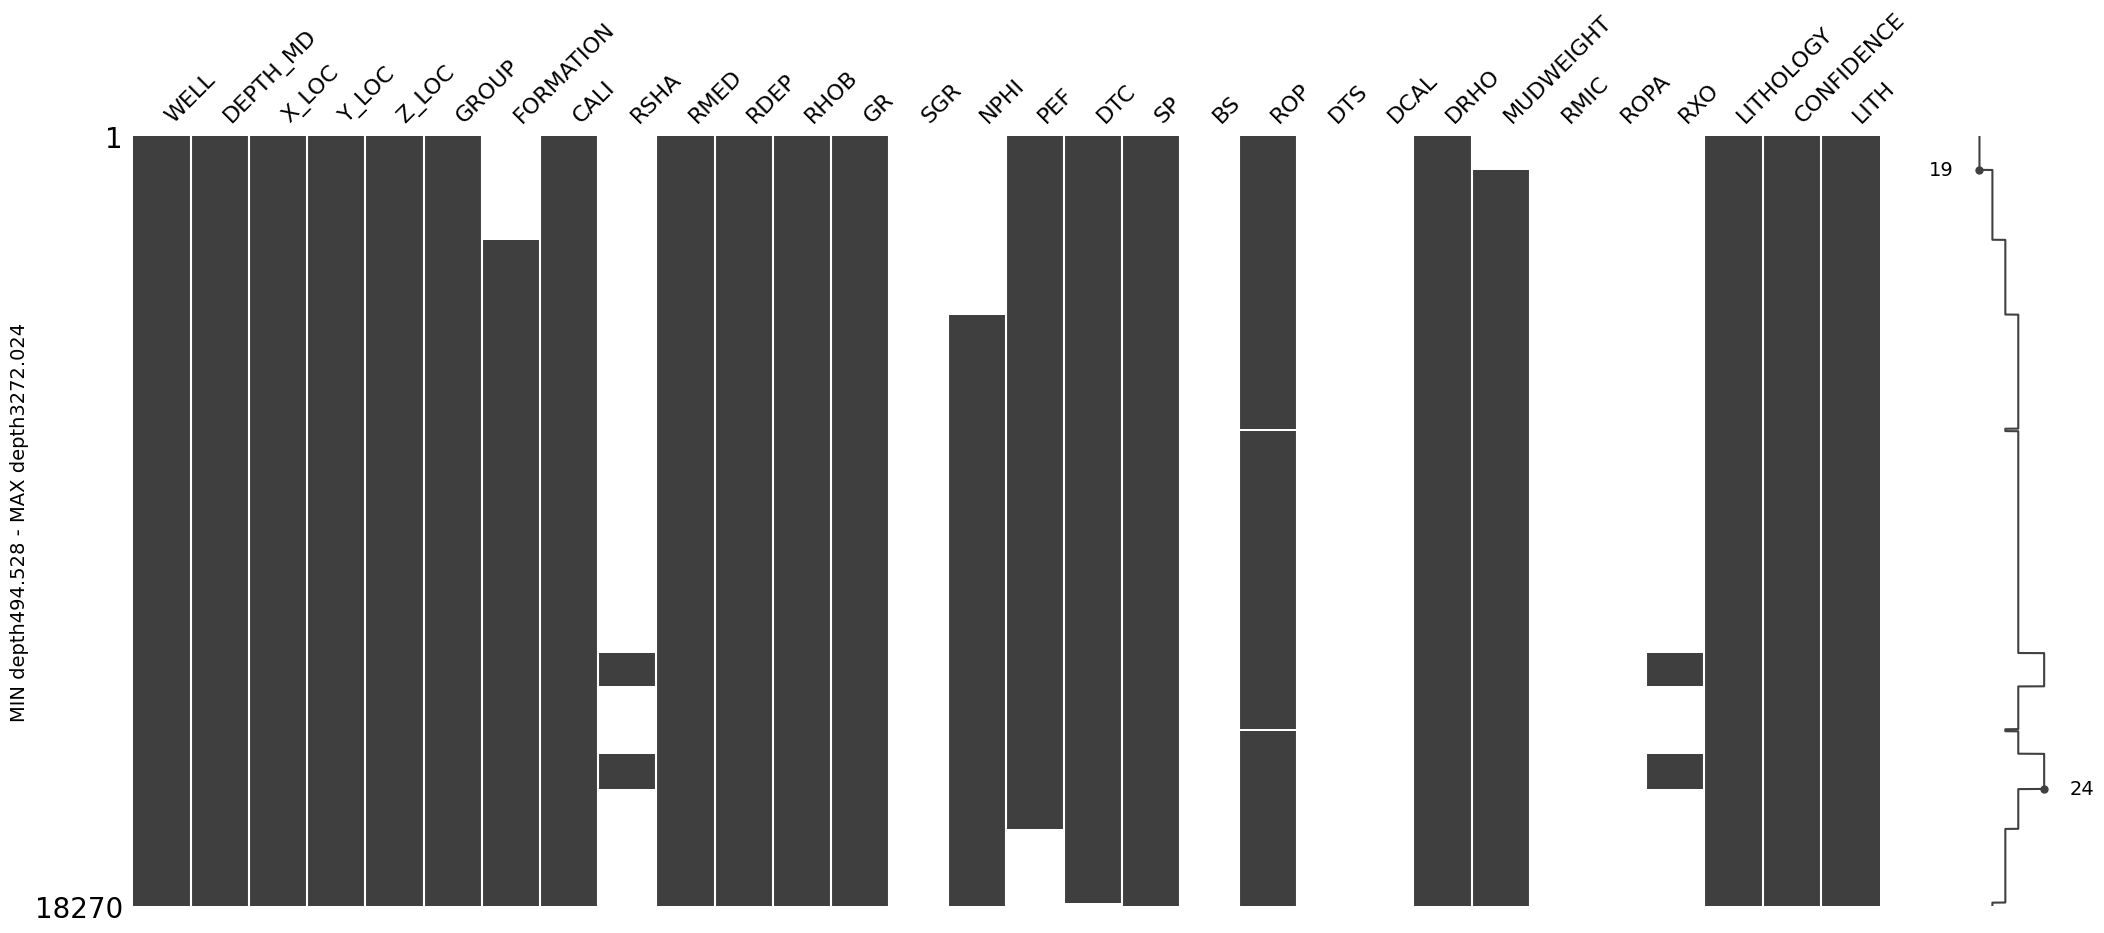

In [41]:
plot_missingno(well_data)

<Axes: >

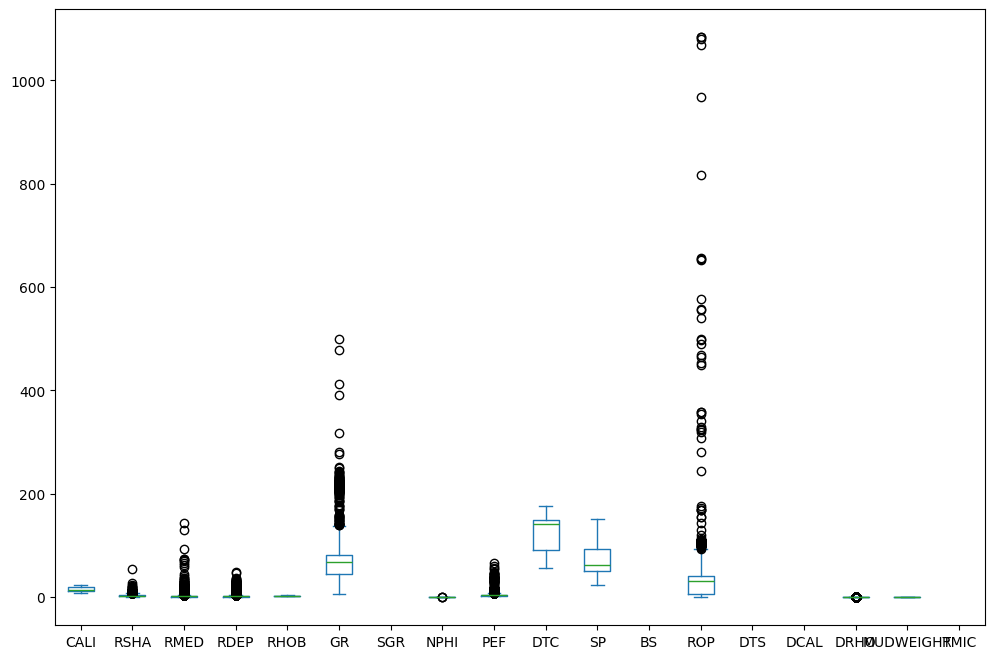

In [48]:
well_data.iloc[:,5:-5].plot(kind='box', figsize=(12, 8))

In the next notebook we'll visualise the logs for each well as we'll do with any of the softwares (Powerlog, techlog, IP or petrel)

# References

Bormann, Peter, Aursand, Peder, Dilib, Fahad, Manral, Surrender, & Dischington, Peter. (2020). FORCE 2020 Well well log and lithofacies dataset for machine learning competition [Data set]. Zenodo. http://doi.org/10.5281/zenodo.4351156